## Bağlantımızı yapalım

In [33]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Gerekli kütüphaneleri import edelim

In [25]:
import numpy as np
from PIL import Image

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

Using TensorFlow backend.


## ImageNet veri seti için eğitilen VGG16 modelinin parametrelerini alalım

ImageNet veri seti çok büyük. İndirmemiz yerine modeli aldık

In [26]:
model = VGG16(weights="imagenet",include_top=True)

553467904/553467096 [==============================] - 12s 0us/step


## Modelin yapısına bi bakalım

In [27]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers

{'block1_conv1': <tf.Tensor 'block1_conv1/Relu:0' shape=(None, 224, 224, 64) dtype=float32>,
 'block1_conv2': <tf.Tensor 'block1_conv2/Relu:0' shape=(None, 224, 224, 64) dtype=float32>,
 'block1_pool': <tf.Tensor 'block1_pool/MaxPool:0' shape=(None, 112, 112, 64) dtype=float32>,
 'block2_conv1': <tf.Tensor 'block2_conv1/Relu:0' shape=(None, 112, 112, 128) dtype=float32>,
 'block2_conv2': <tf.Tensor 'block2_conv2/Relu:0' shape=(None, 112, 112, 128) dtype=float32>,
 'block2_pool': <tf.Tensor 'block2_pool/MaxPool:0' shape=(None, 56, 56, 128) dtype=float32>,
 'block3_conv1': <tf.Tensor 'block3_conv1/Relu:0' shape=(None, 56, 56, 256) dtype=float32>,
 'block3_conv2': <tf.Tensor 'block3_conv2/Relu:0' shape=(None, 56, 56, 256) dtype=float32>,
 'block3_conv3': <tf.Tensor 'block3_conv3/Relu:0' shape=(None, 56, 56, 256) dtype=float32>,
 'block3_pool': <tf.Tensor 'block3_pool/MaxPool:0' shape=(None, 28, 28, 256) dtype=float32>,
 'block4_conv1': <tf.Tensor 'block4_conv1/Relu:0' shape=(None, 28, 28,

Toplam parametre sayısına da bi bakalım

In [28]:
model.count_params() # Biraz çok!

138357544

##Örnek resmimizi çağıralım

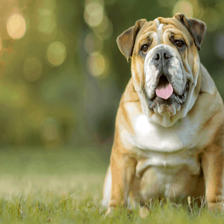

In [34]:
resim_path = "/content/drive/My Drive/notebooks/images"

kopek = Image.open(resim_path + "/bulldog.png")
kopek = kopek.resize((224, 224))
kopek

Görüntümüzü diziye çevirelim

In [35]:
# Görüntüyü diziye çevir
x = np.asarray(kopek, dtype='float32')
# Dizi listesine çevir
x = np.expand_dims(x, axis=0)
# Giriş görüntüsünü eğitim setine uygun şekilde ön işlemleri yap 
x = preprocess_input(x)

## Örnek resmimizi modele tabi tutalım

In [36]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])
print(decode_predictions(preds, top=1)[0][0][1])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02108422', 'bull_mastiff', 0.8154412), ('n02093428', 'American_Staffordshire_terrier', 0.064626195), ('n02108089', 'boxer', 0.05410902)]
bull_mastiff
